# Visualizations and Preprocessing of Data

***

### Import Modules

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Data Dictionary 

<details><summary>Ames Data Description</summary>
    
- [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
</details>

***

### Read the cleaned data

In [5]:
clean_train = pd.read_csv('../datasets/clean_train.csv')

In [6]:
pd.set_option('display.max_columns', None)    

clean_train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,70.0,13517,Pave,3,Lvl,1,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,3,Lvl,1,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,4,Lvl,1,Inside,3,Names,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,4,Lvl,1,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,3,Lvl,1,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,3,2010,WD,138500


In [7]:
clean_train.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2029 non-null   int64  
 1   PID              2029 non-null   int64  
 2   MS SubClass      2029 non-null   int64  
 3   MS Zoning        2029 non-null   object 
 4   Lot Frontage     2029 non-null   float64
 5   Lot Area         2029 non-null   int64  
 6   Street           2029 non-null   object 
 7   Lot Shape        2029 non-null   int64  
 8   Land Contour     2029 non-null   object 
 9   Utilities        2029 non-null   int64  
 10  Lot Config       2029 non-null   object 
 11  Land Slope       2029 non-null   int64  
 12  Neighborhood     2029 non-null   object 
 13  Condition 1      2029 non-null   object 
 14  Condition 2      2029 non-null   object 
 15  Bldg Type        2029 non-null   object 
 16  House Style      2029 non-null   object 
 17  Overall Qual  

***

### Important Distibutions and Correlations

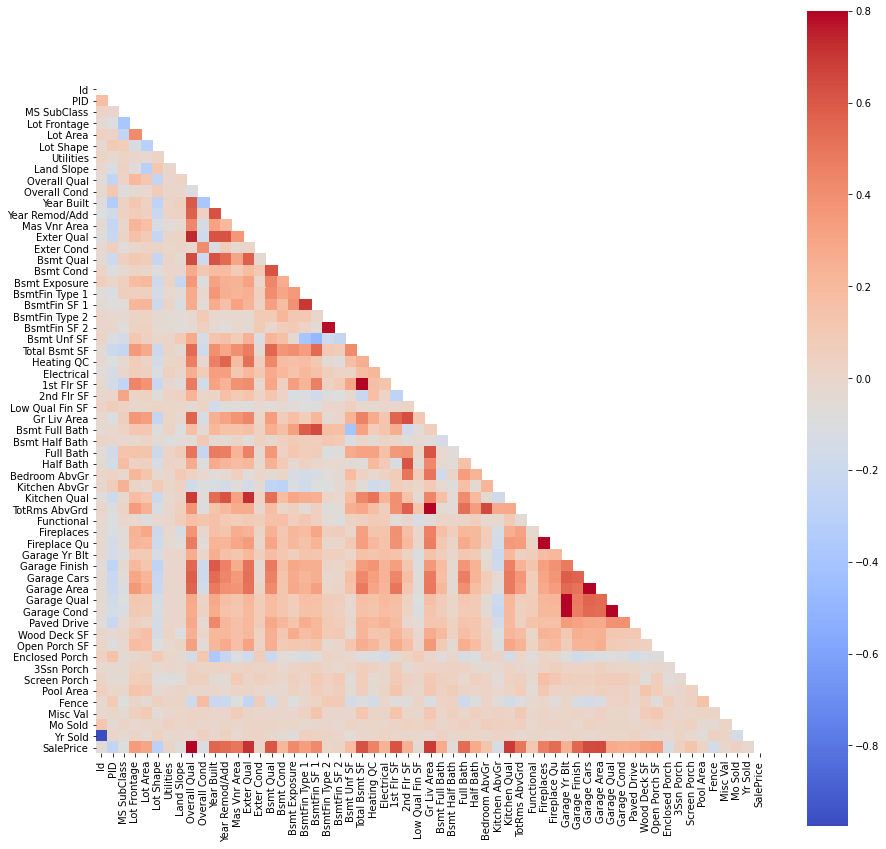

In [6]:
# Heatmap to show the above correlation
train_correlation = clean_train.corr()

f, ax = plt.subplots(figsize=(15, 15)) 
mask = np.zeros_like(train_correlation)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(train_correlation, mask=mask,  vmax=.8, square=True, cmap='coolwarm')


In [8]:
clean_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)


,SalePrice
SalePrice,1.000000
Overall Qual,0.797463
Exter Qual,0.709869
Gr Liv Area,0.694956
Kitchen Qual,0.689562
Garage Area,0.648170
Garage Cars,0.645071
Total Bsmt SF,0.624187
1st Flr SF,0.616066
Bsmt Qual,0.608673


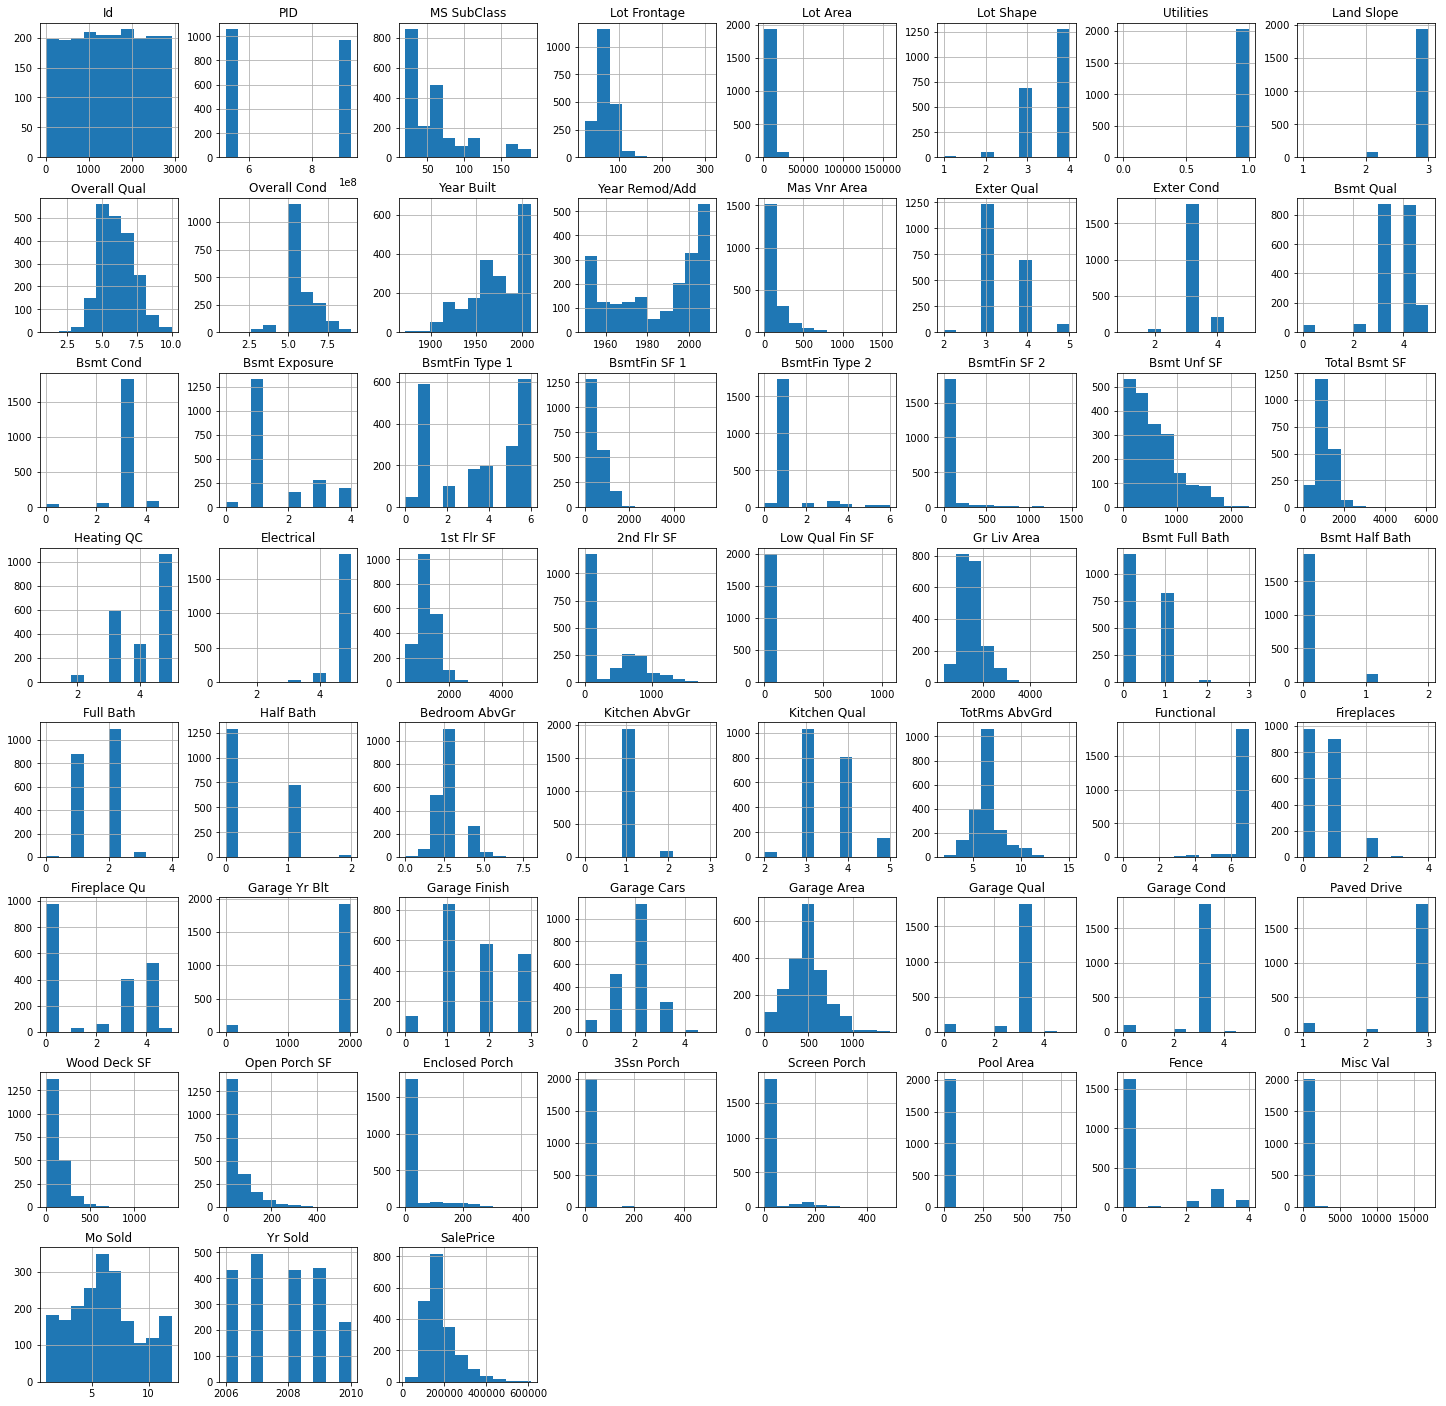

In [8]:
clean_train.hist(figsize=(25,25));

### Visualizations for some of the columns with SalePrice

#### Overall Qual with SalePrice

In [77]:
# Function to plot a Boxplot
def boxplot(col1,col2,df, title):
    plt.figure(figsize=(18,10))
    sns.boxplot(x=col1, y=col2, data=df)
    plt.title(title, fontsize=20)
    plt.xlabel(col1, fontsize=16)
    plt.ylabel(col2, fontsize=16)
    plt.xticks(size=10,rotation='vertical')
    plt.tight_layout()
    return None
    
# Function to plot a Barplot
def barplot(col1,col2,df, title, estimate):
    plt.figure(figsize=(18,10))
    sns.barplot(x=col1, y=col2, data=df, estimator = estimate)
    plt.title(title, fontsize=20)
    plt.xlabel(col1, fontsize=16)
    plt.ylabel(col2, fontsize=16)
    plt.xticks(size=10,rotation='vertical')
    plt.tight_layout()  
    return None

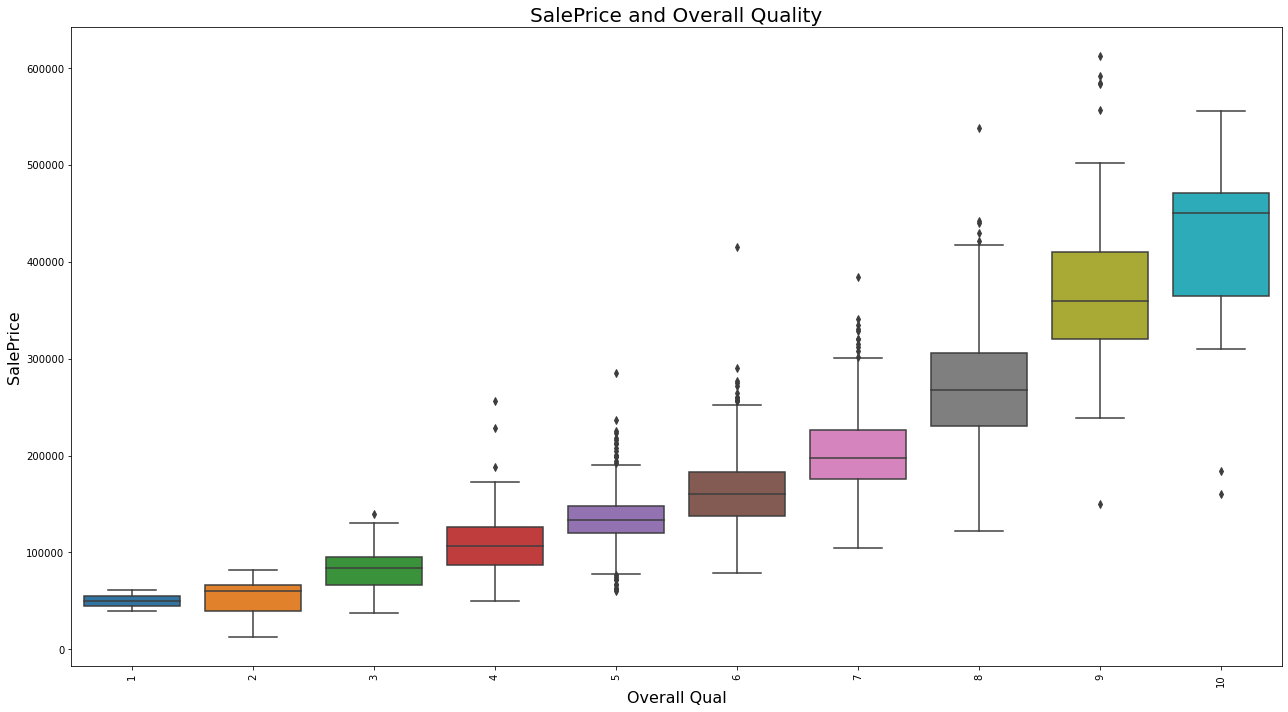

In [10]:

boxplot('Overall Qual', 'SalePrice', clean_train, 'SalePrice and Overall Quality')


As Expected we can see that higher the Overall Quality higher is the SalePrice for a house. 

#### Year Built Vs Sale Price

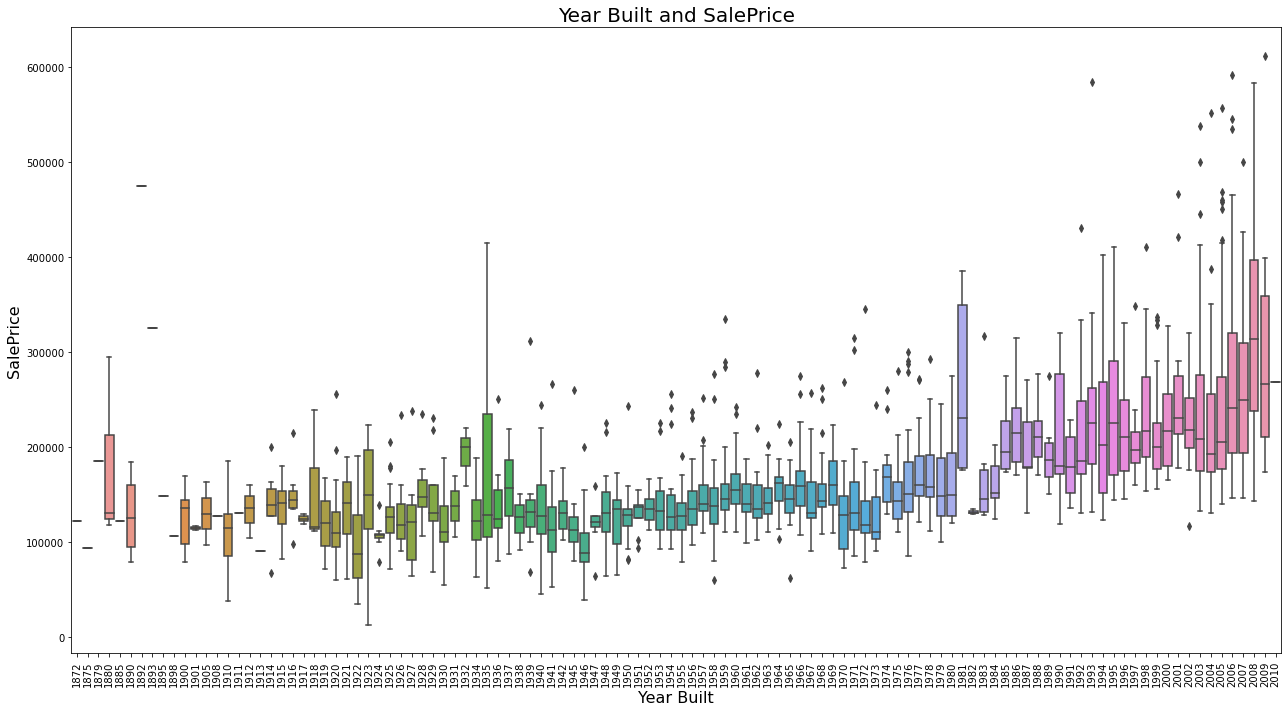

In [14]:
boxplot('Year Built', 'SalePrice', clean_train, 'Year Built and SalePrice')


Based on the Boxplot above we can see that the oldest house built was in 1872, and the newest in 2010. The range of saleprice increase considerably from 1980s to 2010s 

#### Function to plot subplots of distributions and scatter plot

In [15]:
def hist_scatter(df,column,title_list,xlabel):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    ax = ax.ravel()
    ax[0].hist(df[column],bins=50)
    ax[1].scatter(df[column],df['SalePrice'],alpha=0.6, edgecolors='white' ,linewidths=0.5)
    ax[1].set_ylabel('Sale price', fontsize=12)
    for i, column in enumerate(title_list): 
        ax[i].set_xlabel(xlabel, fontsize=12)
        ax[i].set_title(title_list[i], fontsize=16)
        
    return None

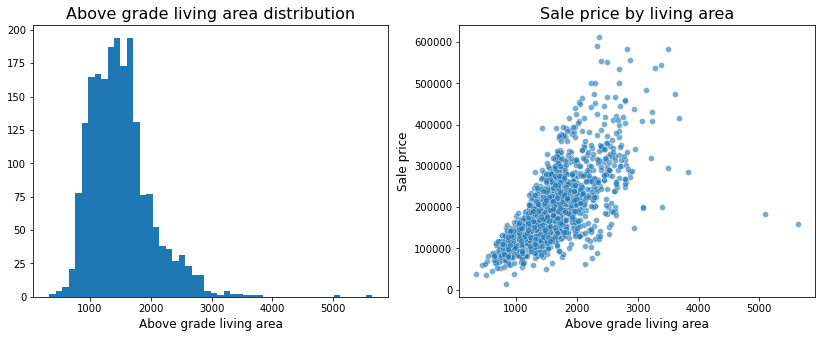

In [16]:
# Plots for Grade level living area

hist_scatter(clean_train, 'Gr Liv Area',
             ['Above grade living area distribution','Sale price by living area'],
             'Above grade living area')        

Based on the plots above we can see that the distribution is right skewed. The data shows clear positive correlation between the SalePrice and grade living area. There are 2 outliers in the Grade living area which have highest square feet area but the sale price is less than 200k, which is well below average. Generally houses with high prices should have high sqft area.

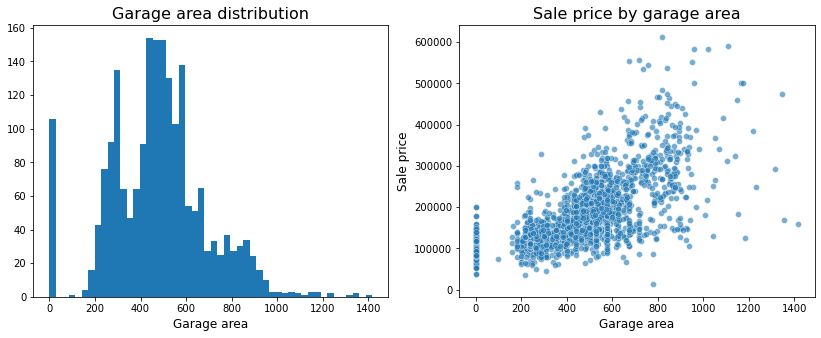

In [17]:
# Plots for Garage area
hist_scatter(clean_train, 'Garage Area',
             ['Garage area distribution','Sale price by garage area'],
             'Garage area')

The distribution for the Garage area is bi modal. There are very high number of houses without garages. The distribution is also right skewed. We can see a linear positive relationship with the SalePrice but has a larger spread.

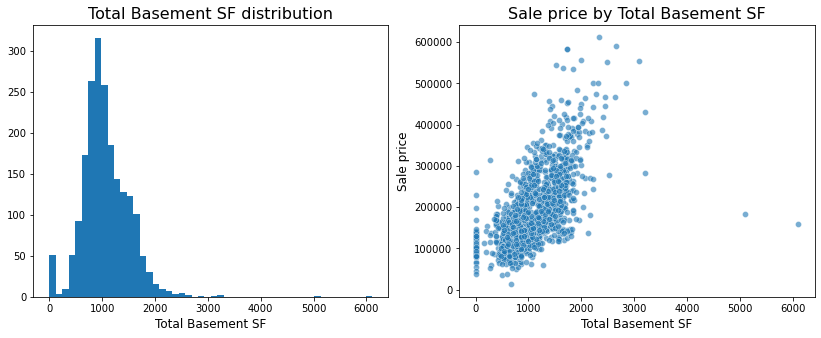

In [18]:
# Plot of Total Basement Square Feet area

hist_scatter(clean_train, 'Total Bsmt SF',
             ['Total Basement SF distribution','Sale price by Total Basement SF'],
             'Total Basement SF')

The distribution for the Basement area is slightly right skewed. About 50 housesdo not have Basements. Houses in Ames Iowa seem to like basements and this could be a very important feature in the sale price of a house. This can also be seen in the linear positive relationship with Saleprice. Although there are 2 outliers.

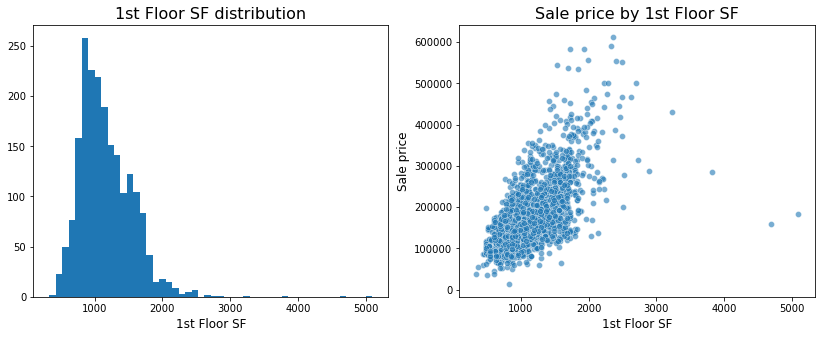

In [19]:
# Plot of 1st Floor Square Feet area

hist_scatter(clean_train, '1st Flr SF',
             ['1st Floor SF distribution','Sale price by 1st Floor SF'],
             '1st Floor SF')


We can see that the 1st Floor area distribution is right skewed. It does have a linear positive relation with Saleprice. with 2 outliers. Usually the 1st floor area will be almost equal to the grade living area since the 1st floor is built on top if it. We might face some data leakage due to this feature. 

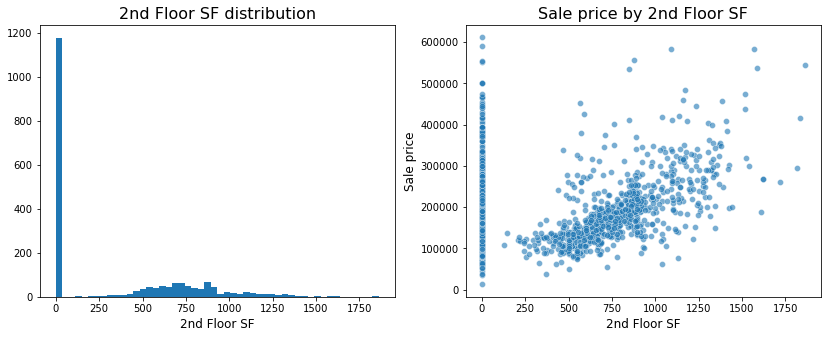

In [20]:
# Plot of 1st Floor Square Feet area

hist_scatter(clean_train, '2nd Flr SF',
             ['2nd Floor SF distribution','Sale price by 2nd Floor SF'],
             '2nd Floor SF')


The distribution for the 2nd Floor Area has mostly 0, meaning about 1200 houses have no 2nd floor and we can may be delete this column since the correlation with SalePrice is lower than 0.24 and represent this column as a binary column, like 1 = has 2nd floor, 0 = no second floor

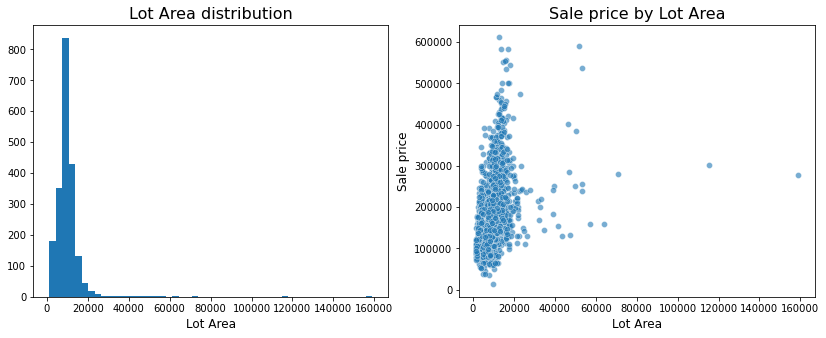

In [21]:
# Plot of Lot area

hist_scatter(clean_train, 'Lot Area',
             ['Lot Area distribution','Sale price by Lot Area'],
             'Lot Area')


The distribution for the Lot Area is right skewed, and the correlation is positive but not very high. We can see here few lots with area more than an Acre (43560 SqFt) but the Sale Prices are not too high as you would expect, these can be considered as outliers.

#### Investigate the outliers from the above plots

In [22]:
clean_train[clean_train['Gr Liv Area']>5000][['Gr Liv Area','Total Bsmt SF', '1st Flr SF']]


,Gr Liv Area,Total Bsmt SF,1st Flr SF
947,5642,6110.0,4692
1866,5095,5095.0,5095


This shows that two outliers are also outliers in the grade living area correpond to the basement and 1st floor area as well. Although we might want to delete these values, we will keep them in the dataset as this could be valuable in the accuracy of our model.

#### Neighborhood And SalePrice

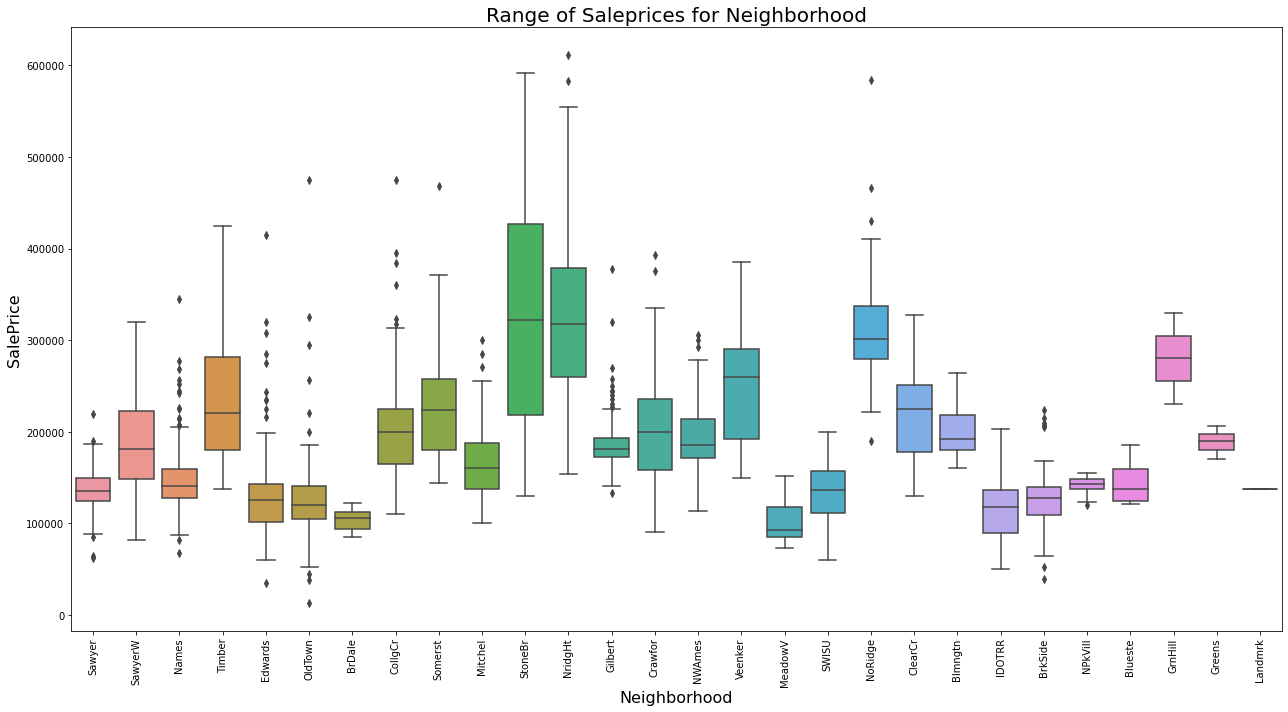

In [23]:


boxplot('Neighborhood', 'SalePrice', clean_train, 'Range of Saleprices for Neighborhood')


We see the sale prices for all the neighborhoods shown in the boxplot along with the range of prices the houses sold and the median price. We also see some outliers as well. the spread is large when it comes to house prices and neighborhoods.

Location is a one of the most important considerations for a home buyer. There are many factors that influence a location as the top location like, the socio economic status of people living there, the schools, the amenities, geological features, etc. Neighborhood is an important feature in modeling the housing data. We can dummify this as part of feature engineering. but there are 28 unique values and dummifying will add 28 more columns to the dataset, which might not be a feasible thing to do. We will consider binning(ordinal variable) the neighborhoods based on the house overall quality and overall condition and the proximity to various conditions.

#### Year Built
We find it more insightful to calculate the age of the house at the time it was sold as this is a slightly better representation of house age

In [24]:
# Adding Age column at the time of sale of the house

clean_train['Age'] = clean_train['Yr Sold']- clean_train['Year Built']



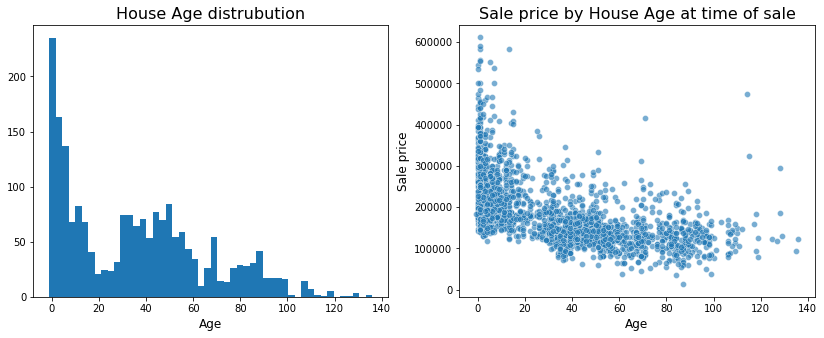

In [25]:
 # Plot of Age of the house

hist_scatter(clean_train, 'Age',
             ['House Age distrubution','Sale price by House Age at time of sale'],
             'Age')
   

The distribution for Age is heavily right skewed. There is a negative linear relation of Age with the Saleprice. This is because buyers are ready to pay higher for newer house. We also need to keep in mind that some of them were Remodeled and for those house the age will not simply be the difference between the year built and year sold, but rather difference between year remodeled and year sold.For this purpose we can create a dummy variable which shows the house were remodeled or not (1 and 0).

### Visualizations for Categorical variables

In [26]:
#  count plots of categorical features
cat_features = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config',
                'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
                'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Sale Type']


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


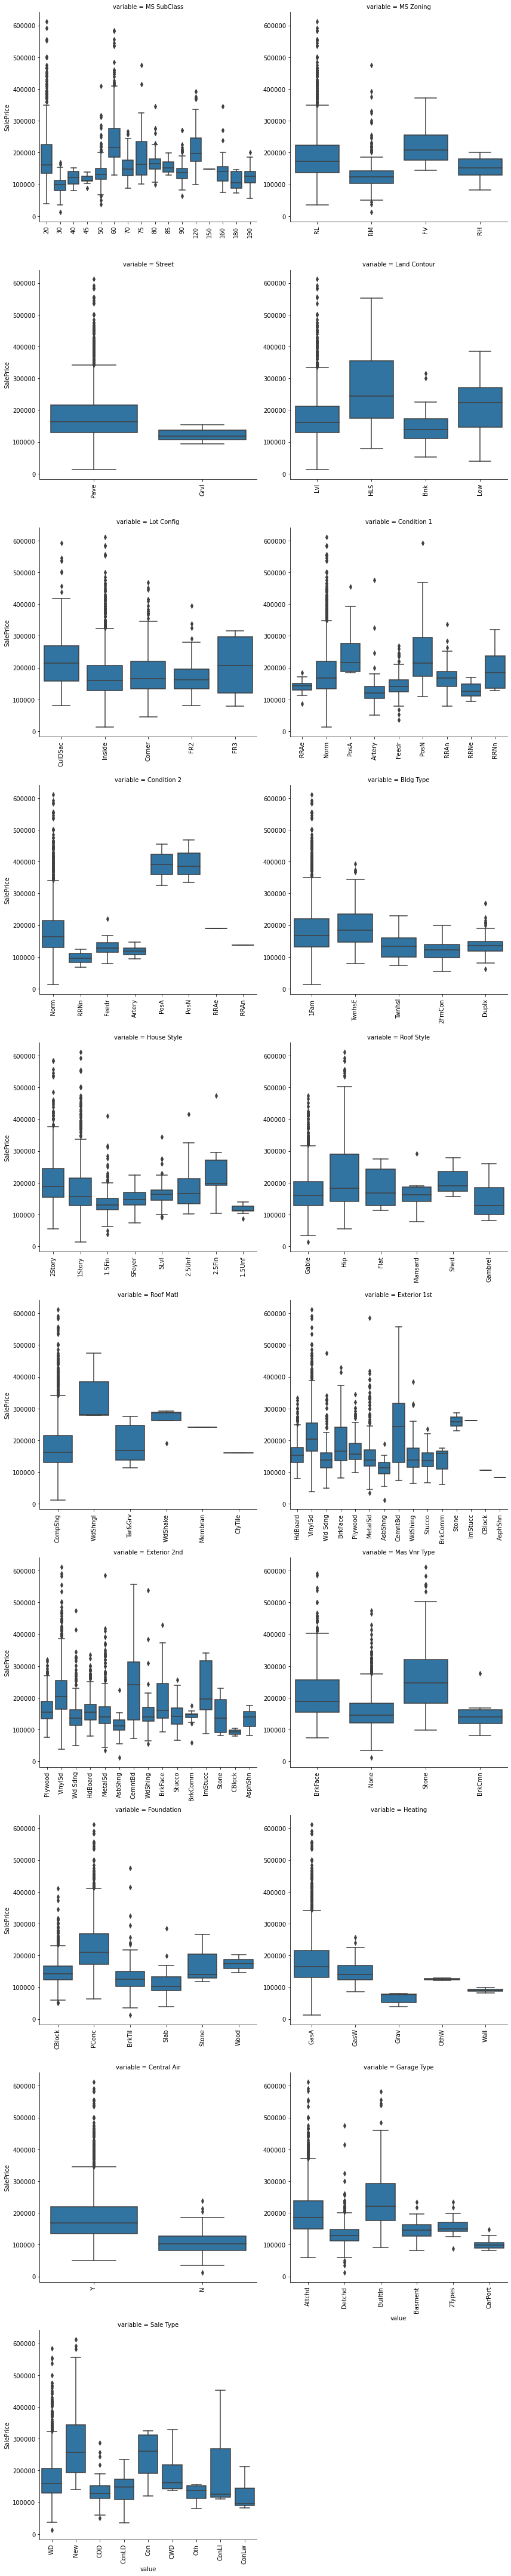

In [27]:
# Source: https://stackoverflow.com/questions/52472757/creating-a-boxplot-facetgrid-in-seaborn-for-python
f = pd.melt(clean_train, id_vars = ['SalePrice'], value_vars=cat_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

The above plots show that there is significant variance in the median Saleprice within each value of these categorical features. Based on these we can choose to dummify or change them into ordinal variables.

***

### Visualizations for number of Bedrooms, Baths, Kitchen, Fireplaces 

In [28]:
room_features = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
                'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
                'TotRms AbvGrd', 'Fireplaces']

In [29]:
def plot(col1,col2,df, title):
    fig = plt.figure(figsize=(6,4))
    plt.title(title)
    sns.regplot(x=col1,y=col2,data=df,
                scatter_kws={'s':15},
                line_kws={'color':'orange'})

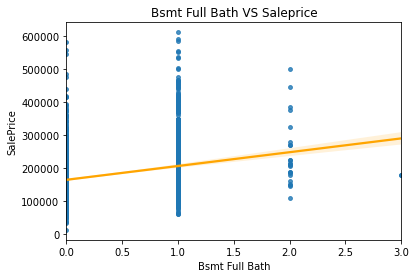

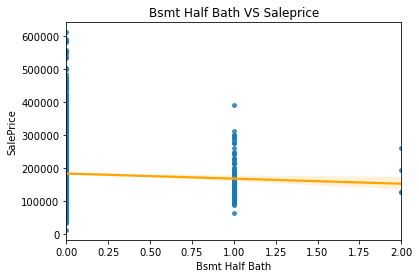

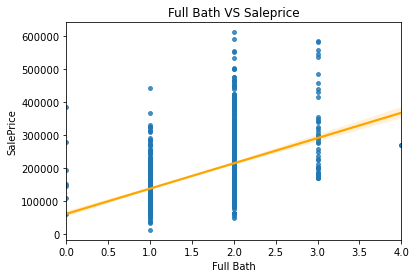

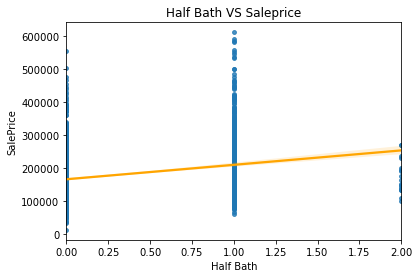

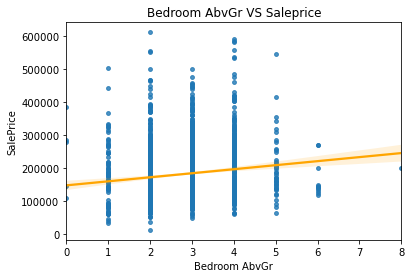

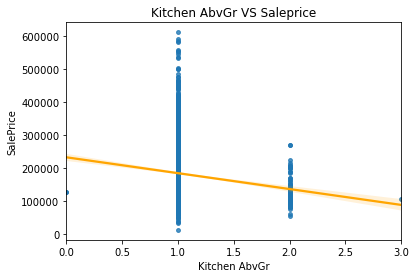

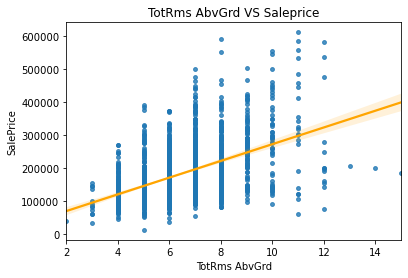

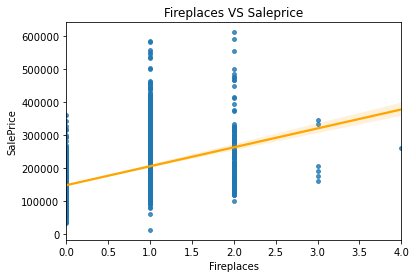

In [30]:
for i in room_features:
    plot(i, 'SalePrice', clean_train, i+' VS Saleprice')

Based on the plots above we see that the Fireplace and Total rooms have most linear positive relation with the Saleprices. 

***

### Feature Creation and Selection

In [31]:
#  make a copy of the clean_train dataset
ames_train = clean_train.copy() 

In [32]:
#  removing the ' ' from column names and adding '_'

ames_train.columns = ames_train.columns.str.replace(' ', '_')

#### Understanding Total Rooms above grade
The Fannie Mae/Freddie Mac form appraisal report, used by conventional mortgage lenders as well as FHA & VA, describes a house by the total room count, the number of bedrooms and the number of bathrooms it contains. For example, reported above grade room count on the form of 6/3/1.1 describes a house with 6 rooms, 3 bedrooms, 1 full and 1 half bathroom. (A 1.2 baths would be 1 full bath and 2 half baths).  Like basement square footage, the finished rooms in a basement are identified separately from the above grade room count.
<br>
In general, a room is a kitchen, a bedroom, a living room, a dining room, a family room, an office, a study or a den. Rooms do not have to be divided by walls as long as there is space for the intended function.  In many markets, an open concept design or floor plan has been used, which typically encompasses a kitchen, dining room and living room.  In such situations, the open area, sometimes referred to as a “Great Room”, would usually be counted as three rooms even though there are no walls to separate those areas.  Bathrooms, breakfast nooks, storage rooms, mudrooms, laundry rooms, foyers and closets are not usually considered in the total room counts.
Source:http://nationalappraiserroster.com/Resources/Appraising101/UnderstandingMeasurementsRoomCounts/tabid/223/Default.aspx

In [33]:
pd.set_option('display.max_columns', None)    

ames_train.head(2)

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Age
0,109,533352170,60,RL,70.0,13517,Pave,3,Lvl,1,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,3,2010,WD,130500,34
1,544,531379050,60,RL,43.0,11492,Pave,3,Lvl,1,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,4,2009,WD,220000,13


- As mentioned above the Total rooms above grade inclues all the rooms in th egrade level living. We can seperate this information into 'total bedrooms' and 'other rooms', and drop the Total Rooms column. <br>
- Similarly The 'Gr Liv Area' is the sum of '1st Flr SF' and '2nd Flr SF',  we can delete the 'Gr Liv Area' and keep only 1st Flr SF and 2nd Flr SF <br>
- 'Total Bsmt SF' is the sum of  'BsmtFin SF 1'  and  'Bsmt Unf SF', we can drop 'Total Bsmt SF '
- 'Garage Cars' and 'Garage area': creating a column for Garage_area/car = Garage_area/Garage_Cars, and drop Garage_Area column


In [34]:
# Creating variable: Other_Rooms = TotRms_AbvGrd - Bedroom_AbvGr and drop TotRms_AbvGrd column

ames_train['Other_Rooms'] = ames_train['TotRms_AbvGrd'] - ames_train['Bedroom_AbvGr']

# Creating variable: Garage_area/car  =  Garage_area/Garage_Cars, and drop Garage_Area column
ames_train['Garage_area/car'] = ames_train['Garage_Area']/ames_train['Garage_Cars']

# dropping columns TotRms_AbvGrd, Gr_Liv_Area, Total_Bsmt_SF, Garage_Area

ames_train.drop(columns = ['TotRms_AbvGrd', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Garage_Area'], inplace = True)

ames_train.head(2)

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Age,Other_Rooms,Garage_area/car
0,109,533352170,60,RL,70.0,13517,Pave,3,Lvl,1,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,GasA,5,Y,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,Attchd,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,2010,WD,130500,34,3,237.5
1,544,531379050,60,RL,43.0,11492,Pave,3,Lvl,1,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,GasA,5,Y,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,Attchd,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,2009,WD,220000,13,4,279.5


In [35]:
#  Some houses have no garages, we and fill the NAN values with 0

ames_train['Garage_area/car'] = ames_train['Garage_area/car'].fillna(0)

In [43]:
ames_train.isnull().sum().sum()


0

In [40]:
ames_train.loc[ames_train['Garage_Type'].isnull()].head()
ames_train['Garage_Type'] = ames_train['Garage_Type'].fillna(0)
#  the garage area for these columns are 0, means there are no garages

### Neighborhood ordinal columns

Lets create a score for the overall quality and overall condition of the house by adding the values together.We can also add the Exterior Qual and condition to this score So your total score for the house will be out of (10+10+5+5) 30

In [46]:

ames_train['overall_score'] = ames_train['Overall_Qual'] + ames_train['Overall_Cond'] +ames_train['Exter_Qual'] +ames_train['Exter_Cond']

In [47]:
ames_train.groupby('Neighborhood')['overall_score'].mean().sort_values()

Neighborhood
MeadowV    16.291667
IDOTRR     16.604167
Edwards    16.769231
Landmrk    17.000000
Sawyer     17.126126
BrDale     17.157895
SWISU      17.312500
Names      17.316129
Mitchel    17.518519
BrkSide    17.578947
OldTown    17.803681
ClearCr    17.925926
NPkVill    18.000000
Gilbert    18.103448
SawyerW    18.264368
CollgCr    18.677778
NWAmes     18.678161
GrnHill    19.000000
Blueste    19.166667
Blmngtn    19.181818
Crawfor    19.197183
Timber     19.312500
Somerst    19.461538
NoRidge    20.166667
Greens     20.333333
Veenker    20.352941
NridgHt    20.622951
StoneBr    20.842105
Name: overall_score, dtype: float64

In [48]:
ames_train.groupby('Neighborhood')['SalePrice'].count().sort_values()

Neighborhood
Landmrk      1
GrnHill      2
Greens       3
Blueste      6
Veenker     17
NPkVill     17
BrDale      19
Blmngtn     22
MeadowV     24
ClearCr     27
SWISU       32
StoneBr     38
IDOTRR      48
Timber      48
NoRidge     48
Crawfor     71
BrkSide     76
Mitchel     81
NWAmes      87
SawyerW     87
Sawyer     111
Gilbert    116
NridgHt    122
Somerst    130
Edwards    143
OldTown    163
CollgCr    180
Names      310
Name: SalePrice, dtype: int64

In [49]:
ames_train.groupby('Neighborhood')['SalePrice'].max().sort_values()

Neighborhood
BrDale     122500
Landmrk    137000
MeadowV    151400
NPkVill    155000
Blueste    185000
SWISU      200000
IDOTRR     202500
Greens     206000
Sawyer     219000
BrkSide    223500
Blmngtn    264561
Mitchel    300000
NWAmes     306000
SawyerW    320000
ClearCr    328000
GrnHill    330000
Names      345000
Gilbert    377500
Veenker    385000
Crawfor    392500
Edwards    415000
Timber     425000
Somerst    468000
OldTown    475000
CollgCr    475000
NoRidge    584500
StoneBr    591587
NridgHt    611657
Name: SalePrice, dtype: int64

#### Based on the above details we can create 4 distinct categories to bin our neighborhoods in. 

In [50]:
neigh_dict = {1 : ['BrDale', 'Landmrk', 'MeadowV', 'Edwards', 'SWISU', 'IDOTRR', 'Sawyer'], 
              2 : ['Names', 'BrkSide', 'ClearCr', 'OldTown', 'Gilbert', 'NPkVill', 'Mitchel'],
              3 : ['SawyerW', 'CollgCr', 'NWAmes', 'GrnHill', 'Blueste', 'Blmngtn', 'Crawfor'],
              4 : ['Timber', 'Somerst', 'NoRidge', 'Greens', 'Veenker', 'NridgHt', 'StoneBr']}


In [51]:
ames_train['Neighb_Qual'] = ames_train.Neighborhood.map({item: v for v, k in neigh_dict.items() for item in k})
print(ames_train['Neighb_Qual'])


0       1
1       3
2       2
3       4
4       3
       ..
2024    4
2025    1
2026    3
2027    2
2028    2
Name: Neighb_Qual, Length: 2029, dtype: int64


In [113]:
#  Drop the 'Neighborhood' column, because we are representing this data in the for of ordinals

ames_train.drop(columns='Neighborhood', inplace = True)
ames_train.drop(columns='overall_score', inplace = True)


#### Create Dummy columns:

Street Column: Dummy this column since they have only to categories the values fall under: Paved and Gravel

In [53]:
ames_train['Street'].value_counts()

Pave    2026
Grvl       3
Name: Street, dtype: int64

In [54]:
#  create dummies for the Street Column
ames_train = pd.get_dummies(ames_train, columns = ['Street'], drop_first = True)



Land Contour column: create Dummies

In [55]:
ames_train['Land_Contour'].value_counts()


Lvl    1826
HLS      84
Bnk      78
Low      41
Name: Land_Contour, dtype: int64

In [56]:
# Based on the boxplot we saw above we can dummy this column

ames_train = pd.get_dummies(ames_train, columns = ['Land_Contour'], drop_first = True)


Utilities Column: Drop

In [128]:
ames_train.drop(columns=['Utilities'], inplace = True)

MS Zoning column: create Dummies

<AxesSubplot:xlabel='MS_Zoning', ylabel='SalePrice'>

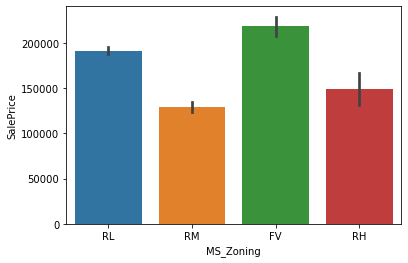

In [57]:
sns.barplot(x= 'MS_Zoning', y = 'SalePrice', data = ames_train)




In [ ]:
ames_train['MS_Zoning'].value_counts()



In [58]:
ames_train = pd.get_dummies(ames_train, columns = ['MS_Zoning'], drop_first = True)


Lot Config: create Dummies



In [59]:
ames_train['Lot_Config'].value_counts()



Inside     1487
Corner      342
CulDSac     131
FR2          60
FR3           9
Name: Lot_Config, dtype: int64

In [117]:
ames_train = pd.get_dummies(ames_train, columns = ['Lot_Config'], drop_first = True)


Condition 1 and 2 columns: Proximity to various Conditions



In [60]:
# lets look at both the conditions with respect to eachother
ames_train.groupby('Condition_2')['Condition_1'].value_counts()
# Most of the data for this falls under the 'Norm' category,
# meaning that most of the houses have Normal proximities to various conditions



Condition_2  Condition_1
Artery       Artery            2
             Feedr             1
             RRAn              1
             RRNn              1
Feedr        RRAn              8
             Feedr             1
             RRNn              1
Norm         Norm           1751
             Feedr            98
             Artery           66
             RRAn             27
             PosN             24
             RRAe             21
             PosA             10
             RRNn              4
             RRNe              3
PosA         PosA              2
             Artery            1
PosN         PosN              3
RRAe         Feedr             1
RRAn         Feedr             1
RRNn         Feedr             2
Name: Condition_1, dtype: int64

In [61]:
ames_train.groupby('Condition_1')['SalePrice'].mean().sort_values()



Condition_1
Artery    129450.000000
RRNe      129616.666667
RRAe      139685.714286
Feedr     146404.653846
RRAn      172604.777778
Norm      186030.996002
RRNn      198208.333333
PosA      254733.333333
PosN      254794.296296
Name: SalePrice, dtype: float64

In [62]:
# Creating dummies for the 2 conditions adn adding them together to get the total in thatvalue for a particular house.
df1 = pd.get_dummies(ames_train['Condition_1'],prefix = 'Condition')
df2 = pd.get_dummies(ames_train['Condition_2'],prefix = 'Condition')


In [ ]:
df1.head()

In [63]:
df2['Condition_RRNe']=0
df2.head()

,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNn,Condition_RRNe
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [64]:
df_sum = df1.add(df2)

In [ ]:
df_sum.head()

In [66]:
#  Add the condition dummy columns to the ames_train dataset.
ames_train = ames_train.merge(df_sum, left_index=True, right_index=True)


# drop condition1, condition 2 
ames_train.drop(columns = ['Condition_1', 'Condition_2'], inplace =True)
ames_train.head()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Lot_Shape,Utilities,Lot_Config,Land_Slope,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Age,Other_Rooms,Garage_area/car,overall_score,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn
0,109,533352170,60,70.0,13517,3,1,CulDSac,3,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,GasA,5,Y,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,Attchd,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,2010,WD,130500,34,3,237.5,21,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,544,531379050,60,43.0,11492,3,1,CulDSac,3,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,GasA,5,Y,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,Attchd,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,2009,WD,220000,13,4,279.5,19,3,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,4,1,Inside,3,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,GasA,3,Y,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,Detchd,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,2010,WD,109000,57,2,246.0,19,2,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,4,1,Inside,3,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,GasA,4,Y,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,BuiltIn,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,2010,WD,174000,4,4,200.0,16,4,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,3,1,Inside,3,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,GasA,3,Y,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,Detchd,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,2010,WD,138500,110,3,242.0,20,3,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0


### Building type and House style: create dummies


In [67]:
ames_train = pd.get_dummies(ames_train, columns = ['Bldg_Type'], drop_first = True)


In [68]:
ames_train['House_Style'].value_counts()
#  We can create ordinal variables under


1Story    1047
2Story     595
1.5Fin     212
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      11
2.5Fin       6
Name: House_Style, dtype: int64

In [69]:
#  We will drop this since this is represented in the 2nd floor SF

ames_train.drop(columns = 'House_Style', inplace = True)


### Roof Style Column:


In [70]:
ames_train['Roof_Style'].value_counts(normalize=True)
# we can dummy this column


Gable      0.790044
Hip        0.193691
Flat       0.006407
Gambrel    0.005421
Mansard    0.002957
Shed       0.001479
Name: Roof_Style, dtype: float64

In [71]:

ames_train = pd.get_dummies(ames_train, columns = ['Roof_Style'], drop_first = True)


In [72]:
# More then 98% of the values are concentrated under Comp Shg, hence we can drop this variable
ames_train.drop(columns = ['Roof_Matl'], inplace =True)



### Year Remod/Add column: create a binary variable for the remodeled column (is_remodeled = 1)

In [73]:
#  creating is_remodeled column


is_Remodeled = (ames_train['Year_Remod/Add']> ames_train['Year_Built'])
ames_train['is_Remodeled'] = 0
ames_train.loc[is_Remodeled, 'is_Remodeled'] = 1
ames_train['is_Remodeled'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_Remodeled, dtype: int64

In [74]:
ames_train['is_Remodeled'].value_counts()
        

0    1098
1     931
Name: is_Remodeled, dtype: int64

In [75]:
# Dropping the year remodeled column and yr_sold

ames_train.drop(columns = ['Year_Remod/Add', 'Yr_Sold'], inplace = True)


### Exterior 1st and Exterior 2nd

In [84]:

# barplot('Exterior_1st','SalePrice',ames_train, 'Saleprice and Exterior 1st', median)


In [82]:
ames_train['Exterior_1st'].value_counts()



VinylSd    723
MetalSd    324
HdBoard    300
Wd Sdng    269
Plywood    151
CemntBd     90
BrkFace     63
WdShing     44
AsbShng     30
Stucco      27
BrkComm      3
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior_1st, dtype: int64

In [83]:
ames_train['Exterior_2nd'].value_counts()



VinylSd    718
MetalSd    317
HdBoard    275
Wd Sdng    255
Plywood    184
CemntBd     90
WdShing     62
BrkFace     33
Stucco      30
AsbShng     26
BrkComm     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior_2nd, dtype: int64

In [85]:
#  We can create dummies and then add the 2 dummies for each exterior 1 and 2 columns
df2 = pd.get_dummies(ames_train['Exterior_1st'],prefix = 'Exterior')
df3 = pd.get_dummies(ames_train['Exterior_2nd'],prefix = 'Exterior')




In [87]:
df_sum_ext = df2.add(df3)

In [88]:
df_sum_ext.isnull().sum()



Exterior_AsbShng    0
Exterior_AsphShn    0
Exterior_BrkComm    0
Exterior_BrkFace    0
Exterior_CBlock     0
Exterior_CemntBd    0
Exterior_HdBoard    0
Exterior_ImStucc    0
Exterior_MetalSd    0
Exterior_Plywood    0
Exterior_Stone      0
Exterior_Stucco     0
Exterior_VinylSd    0
Exterior_Wd Sdng    0
Exterior_WdShing    0
dtype: int64

In [89]:
# #  Add the condition dummy columns to the ames_train dataset.
ames_train = ames_train.merge(df_sum_ext, left_index=True, right_index=True)


# # # drop condition1, condition 2 
ames_train.drop(columns = ['Exterior_1st', 'Exterior_2nd'], inplace =True)
ames_train.head()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Lot_Shape,Utilities,Lot_Config,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,Sale_Type,SalePrice,Age,Other_Rooms,Garage_area/car,overall_score,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing
0,109,533352170,60,70.0,13517,3,1,CulDSac,3,6,8,1976,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,GasA,5,Y,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,Attchd,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,WD,130500,34,3,237.5,21,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,544,531379050,60,43.0,11492,3,1,CulDSac,3,7,5,1996,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,GasA,5,Y,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,Attchd,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,WD,220000,13,4,279.5,19,3,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
2,153,535304180,20,68.0,7922,4,1,Inside,3,5,7,1953,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,GasA,3,Y,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,Detchd,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,WD,109000,57,2,246.0,19,2,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,318,916386060,60,73.0,9802,4,1,Inside,3,5,5,2006,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,GasA,4,Y,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,BuiltIn,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,WD,174000,4,4,200.0,16,4,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
4,255,906425045,50,82.0,14235,3,1,Inside,3,6,8,1900,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,GasA,3,Y,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,Detchd,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,WD,138500,110,3,242.0,20,3,1,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Mas Vnr Type : Drop

In [90]:

ames_train['Mas_Vnr_Type'].value_counts()
# dropping this since the same information is represented in the Exterior column
ames_train.drop(columns = ['Mas_Vnr_Type'], inplace = True)


### Foundation: create dummies 

In [91]:

ames_train['Foundation'].value_counts()

PConc     925
CBlock    850
BrkTil    217
Slab       32
Stone       3
Wood        2
Name: Foundation, dtype: int64

In [92]:
ames_train.groupby('Foundation')['SalePrice'].sum().sort_values()


Foundation
Wood         347500
Stone        524400
Slab        3634774
BrkTil     28215692
CBlock    127087136
PConc     210750424
Name: SalePrice, dtype: int64

In [114]:
# Dummies 
ames_train = pd.get_dummies(ames_train, columns = ['Foundation'], drop_first = True)


### Heating, Central Air columns, Garage type and Sale type columns

In [93]:
#  Delete the heating column since most of the houses have Gas (more than 98%). 
ames_train.drop(columns = ['Heating'], inplace = True)


In [94]:
#  Change Central Air to binary variable
ames_train['Central_Air'] = ames_train["Central_Air"].apply(lambda x: 1 if x == "Y" else 0).astype(int)

In [95]:
#  Garageg type column:
ames_train['Garage_Type'].value_counts()

Attchd     1211
Detchd      526
BuiltIn     132
0           105
Basment      26
2Types       19
CarPort      10
Name: Garage_Type, dtype: int64

In [12]:
# barplot('Garage_Type','SalePrice',ames_train, 'Saleprice and Garage Type', median)



In [96]:
#  We can Dummify the Garage Type column
ames_train = pd.get_dummies(ames_train, columns = ['Garage_Type'], drop_first = True)



#### MS SubClass Column:

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Looking at the Data description for this particular column we can see here that the data MS SubClass is representing multiple columns that is already existing in the data as 'Build Type' , Age of the house, whether the house has 2nf Flr or not. <br>
Based on this we can drop the 'MS SubClass' column

In [97]:
#  drop the 'MS SubClass' column
ames_train.drop(columns = 'MS_SubClass', inplace = True)

#### Sale Type column: Drop

In [98]:
ames_train.drop(columns = ['Sale_Type'], inplace = True)



***

In [ ]:
# # Select only columns related to Area or SF
# Total_area_cols = [col for col in ames_train.columns if 'Area' in col or 'SF' in col]
# area_df = ames_train[Total_area_cols]

In [122]:
#  Dropping some columns that are missing in the test data set.
ames_train.drop(columns = ['Garage_Type_2Types','Exterior_CBlock', 'Exterior_ImStucc', 'Exterior_Stone',
                           'Condition_RRAn', 'Condition_RRAe', 'Condition_RRNn', 'Condition_Artery',
                            'Condition_PosN', 'Condition_RRNe'], inplace = True)

In [131]:
ames_train.head()


,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Feedr,Condition_Norm,Condition_PosA,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CemntBd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside
0,109,533352170,70.0,13517,3,3,6,8,1976,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,5,1,5,725,754,0,0.0,0.0,2,1,3,1,4,7,0,0,1976.0,2,2.0,3,3,3,0,44,0,0,0,0,0,0,3,130500,34,3,237.5,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1,544,531379050,43.0,11492,3,3,7,5,1996,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,5,1,5,913,1209,0,1.0,0.0,2,1,4,1,4,7,1,3,1997.0,2,2.0,3,3,3,0,74,0,0,0,0,0,0,4,220000,13,4,279.5,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,153,535304180,68.0,7922,4,3,5,7,1953,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,3,1,5,1057,0,0,1.0,0.0,1,0,3,1,4,7,0,0,1953.0,1,1.0,3,3,3,0,52,0,0,0,0,0,0,1,109000,57,2,246.0,2,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,4,3,5,5,2006,0.0,3,3,4,3,1,1,0.0,1,0.0,384.0,4,1,5,744,700,0,0.0,0.0,2,1,3,1,3,7,0,0,2007.0,3,2.0,3,3,3,100,0,0,0,0,0,0,0,4,174000,4,4,200.0,4,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,3,3,6,8,1900,0.0,3,3,2,4,1,1,0.0,1,0.0,676.0,3,1,5,831,614,0,0.0,0.0,2,0,3,1,3,7,0,0,1957.0,1,2.0,3,3,1,0,59,0,0,0,0,0,0,3,138500,110,3,242.0,3,1,0,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [145]:
ames_train.shape


(2029, 102)

In [106]:
ames_train.loc[ames_train.isnull().any('columns')]


,Id,PID,Lot_Frontage,Lot_Area,Lot_Shape,Utilities,Lot_Config,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,Functional,Fireplaces,Fireplace_Qu,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Fence,Misc_Val,Mo_Sold,SalePrice,Age,Other_Rooms,Garage_area/car,overall_score,Neighb_Qual,Street_Pave,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,Bldg_Type_2FmCon,Bldg_Type_Duplx,Bldg_Type_TwnhsE,Bldg_Type_TwnhsI,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,is_Remodeled,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD


In [140]:

ames_train.columns


Index(['Id', 'PID', 'Lot_Frontage', 'Lot_Area', 'Lot_Shape', 'Land_Slope',
       'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Mas_Vnr_Area',
       ...
       'Sale_Type_WD', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Lot_Config_CulDSac', 'Lot_Config_FR2', 'Lot_Config_FR3',
       'Lot_Config_Inside'],
      dtype='object', length=110)

### Saving the preprocessed data in csv


In [146]:
ames_train.to_csv('datasets/ames_train.csv', index = False)




In [107]:

pd.set_option('display.max_rows', 500)


In [144]:
ames_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)


,SalePrice
SalePrice,1.000000
Overall_Qual,0.797463
Exter_Qual,0.709869
Kitchen_Qual,0.689562
Neighb_Qual,0.655758
Garage_Cars,0.645071
1st_Flr_SF,0.616066
Bsmt_Qual,0.608673
Other_Rooms,0.565125
Year_Built,0.564011
